# Erste Analyse...
Überapproximations Strategie: `np.argmax(np.sum(np.abs(mat[:, self.input_size:]), axis=0))`

In [1]:
import parse
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
benchmarks = [
    "../results/pre-performance-improvements/ACASXU_run2a_1_1_batch_2000-trunc-1010-0.05/",
    "../results/pre-performance-improvements/ACASXU_run2a_1_2_batch_2000-trunc-1010-0.05/",
    "../results/pre-performance-improvements/HAR-trunc-1000.1-0.25/",
    "../results/pre-performance-improvements/HAR-trunc-1000-0.25/",
    "../results/pre-performance-improvements/mnist_relu_3_100-trunc-400.1-0.25/",
    "../results/pre-performance-improvements/mnist_relu_3_100-trunc-400-0.25/"
]

In [3]:
results = {}
for b in benchmarks:
    try:
        results[b]=parse.BenchmarkRun(
            b+"1/nnequiv-c5c8f02/stdout.log",
            b+"1/nnequiv-c5c8f02/stderr.log",
            out_handlers=[parse.EquivLine, parse.EquivSummarizesLine],
            err_handlers=[parse.RunLim]
            )
    except FileNotFoundError:
        print(f"Could not find {b}")
        results[b]=None

../results/pre-performance-improvements/ACASXU_run2a_1_1_batch_2000-trunc-1010-0.05/: Printed
Depth 81.2199970739036, Nodes 2.8161472995488063e+24
../results/pre-performance-improvements/ACASXU_run2a_1_2_batch_2000-trunc-1010-0.05/: Printed
Depth 94.96048394992837, Nodes 3.8543759400971868e+28
../results/pre-performance-improvements/HAR-trunc-1000.1-0.25/: Printed
Depth 16.0, Nodes 65536.0
../results/pre-performance-improvements/HAR-trunc-1000-0.25/: Skipping...
../results/pre-performance-improvements/mnist_relu_3_100-trunc-400.1-0.25/: Printed
Depth 8.0, Nodes 256.0
../results/pre-performance-improvements/mnist_relu_3_100-trunc-400-0.25/: Skipping...


/home/steuber/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


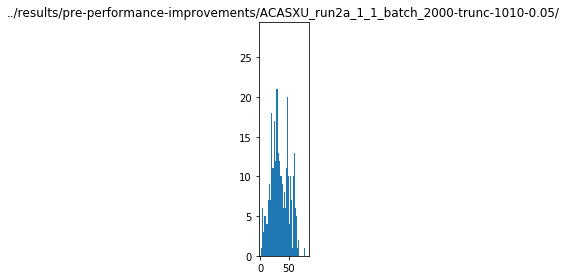

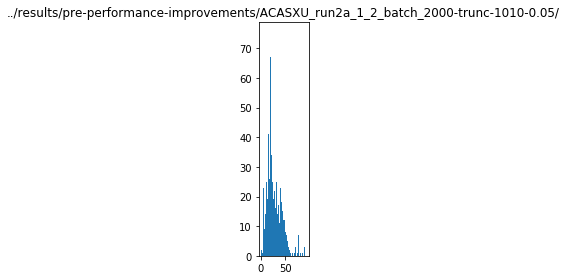

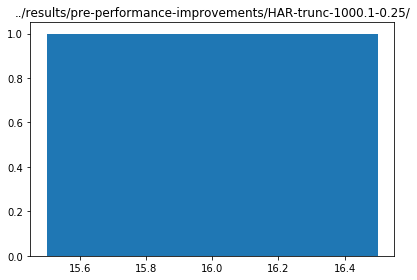

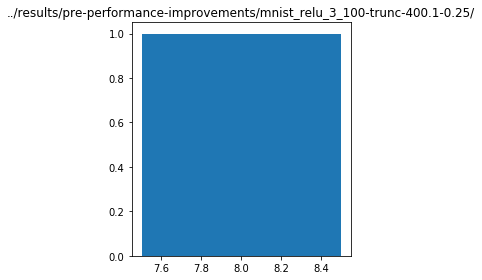

In [4]:
for b in benchmarks:
    print(f"{b}: ",end="")
    if len(results[b].equiv_summarization.summarized)==0:
        print("Skipping...")
        continue
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
    max_val = max(results[b].equiv_summarization.summarized)
    min_val = min(results[b].equiv_summarization.summarized)
    n_bins = max_val-min_val+1

    # We can set the number of bins with the `bins` kwarg
    axs.hist(results[b].equiv_summarization.summarized, bins=n_bins)
    axs.set_title(b)
    print("Printed")
    nodes = 0.0
    for s in results[b].equiv_summarization.summarized:
        nodes+=2**s
    print(f"Depth {math.log2(nodes)}, Nodes {nodes}")

Ich bin mir noch nicht ganz sicher, wie ich diese Zahlen interpretieren muss.
Was auffällt:
- Wenn man sich das ganze als großen Entscheidungsbaum vorstellt, dann überdecken die Überapproximationen von ACAS 1_1 und 1_2 ca. 2^81 bzw. 2^94 Blätter des Baums
- Tatsächlich werden bei exakter Analyse von 1_1 aber nur ca. 62k richtige Knoten besucht (+339k falsche Abbiegungen).
- Wir besuchen also viel mehr "virtuelle Blätter" als tatsächlich vorhanden
- Gleichzeitig werden bei der exakten Analyse 339k falsche Abbiegungen nicht weiter ausgefaltet, die hier mit Überapproximiert werden und die sonst möglicherweise noch weiter ausgefaltet würden.

In [5]:
benchmarks = [
    "../results/pre-performance-improvements/ACASXU_run2a_1_1_batch_2000-trunc-1010-0.05/",
    "../results/pre-performance-improvements/ACASXU_run2a_1_2_batch_2000-trunc-1010-0.05/",
    "../results/pre-performance-improvements/HAR-trunc-1000.1-0.25/",
    "../results/pre-performance-improvements/HAR-trunc-1000-0.25/",
    "../results/pre-performance-improvements/mnist_relu_3_100-trunc-400.1-0.25/",
    "../results/pre-performance-improvements/mnist_relu_3_100-trunc-400-0.25/",
    "../results/pre-performance-improvements/mnist8x8_student_12_12_12_10-9000.5-top/",
    "../results/pre-performance-improvements/mnist8x8_student_12_12_12_10-9100.5-top/",
    "../results/pre-performance-improvements/mnist8x8_student_24_12_10-9000.5-top/",
    "../results/pre-performance-improvements/mnist8x8_student_24_12_10-9100.5-top/",
    "../results/pre-performance-improvements/mnist8x8_student_36_10-9000.5-top/",
    "../results/pre-performance-improvements/mnist8x8_student_36_10-9100.5-top/"
]

In [6]:
results = {}
for b in benchmarks:
    try:
        results[b]=parse.BenchmarkRun(
            b+"1/nnequiv-588200f/stdout.log",
            b+"1/nnequiv-588200f/stderr.log",
            out_handlers=[parse.EquivLine, parse.EquivSummarizesLine],
            err_handlers=[parse.RunLim]
            )
    except FileNotFoundError:
        print(f"Could not find {b}")
        results[b]=None

../results/pre-performance-improvements/ACASXU_run2a_1_1_batch_2000-trunc-1010-0.05/: Printed
Depth 294.08747320065845, Nodes 3.381822290994019e+88
../results/pre-performance-improvements/ACASXU_run2a_1_2_batch_2000-trunc-1010-0.05/: Printed
Depth 286.00000017198266, Nodes 1.2433082392383408e+86
../results/pre-performance-improvements/HAR-trunc-1000.1-0.25/: Printed
Depth 16.0, Nodes 65536.0
../results/pre-performance-improvements/HAR-trunc-1000-0.25/: Skipping...
../results/pre-performance-improvements/mnist_relu_3_100-trunc-400.1-0.25/: Printed
Depth 8.0, Nodes 256.0
../results/pre-performance-improvements/mnist_relu_3_100-trunc-400-0.25/: Skipping...
../results/pre-performance-improvements/mnist8x8_student_12_12_12_10-9000.5-top/: Printed
Depth 37.53940449236989, Nodes 199749992448.0
../results/pre-performance-improvements/mnist8x8_student_12_12_12_10-9100.5-top/: Printed
Depth 20.0, Nodes 1048576.0
../results/pre-performance-improvements/mnist8x8_student_24_12_10-9000.5-top/: Print

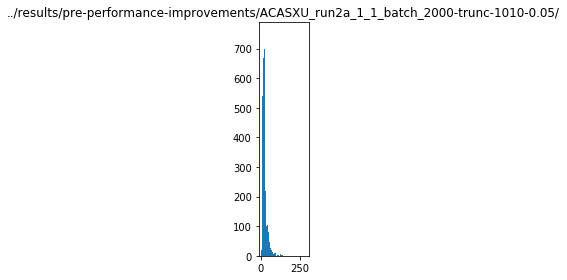

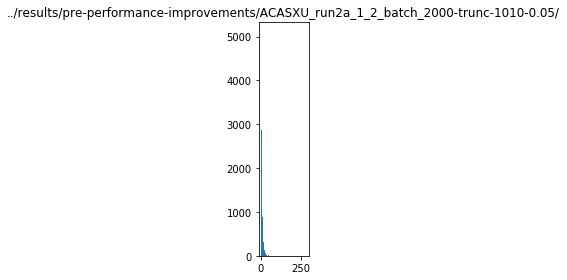

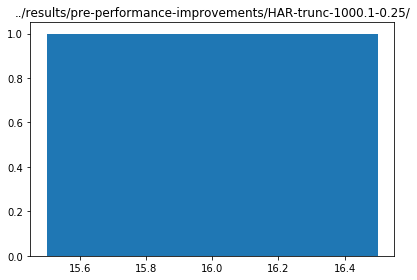

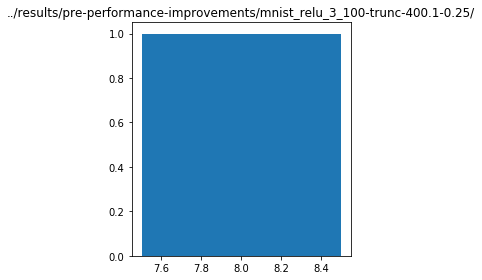

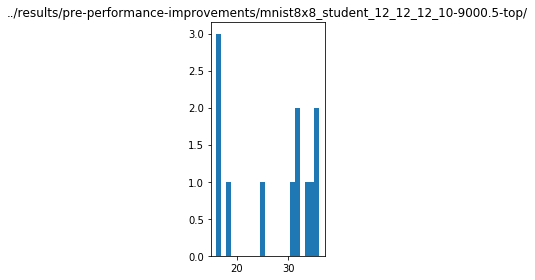

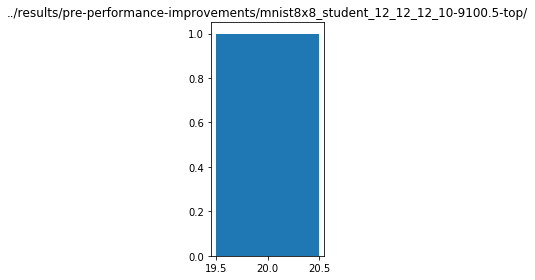

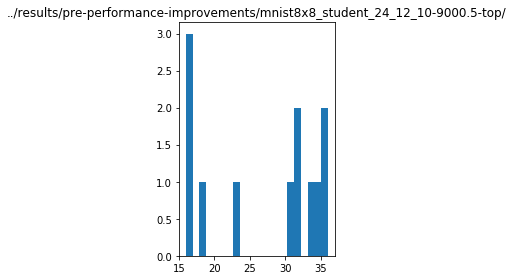

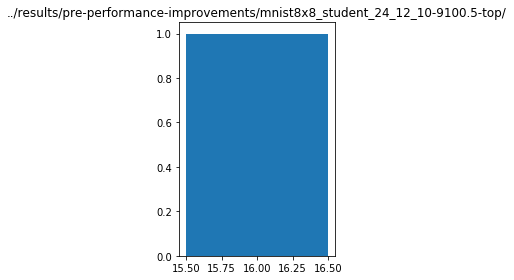

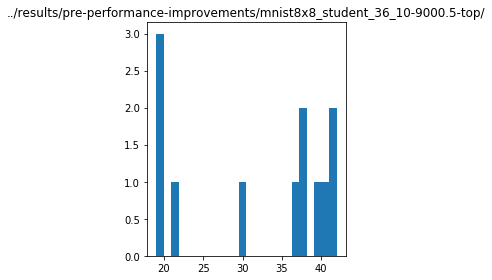

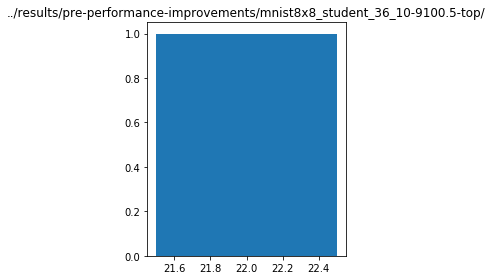

In [7]:
for b in benchmarks:
    print(f"{b}: ",end="")
    if len(results[b].equiv_summarization.summarized)==0:
        print("Skipping...")
        continue
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
    max_val = max(results[b].equiv_summarization.summarized)
    min_val = min(results[b].equiv_summarization.summarized)
    n_bins = max_val-min_val+1

    # We can set the number of bins with the `bins` kwarg
    axs.hist(results[b].equiv_summarization.summarized, bins=n_bins)
    axs.set_title(b)
    print("Printed")
    nodes = 0.0
    for s in results[b].equiv_summarization.summarized:
        nodes+=2**s
    print(f"Depth {math.log2(nodes)}, Nodes {nodes}")

In [8]:
import math
print(math.log2(3.3e+88))
print(math.log2(1.24e+86))

294.052138374559
285.99615628092533
